### Random forest
---

In [ ]:
from funkcije import *

In [ ]:
nemci = pd.read_csv("baza_labelirana.csv")

In [ ]:
for i in nemci.columns.values:
    print("'" + i  + "'" + ',', end='')

2023/07/27 15:00:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2ce7c1c15733454695e613f2d2fa8c90', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2023/07/27 15:00:31 WARNING mlflow.sklearn.utils: log_loss failed. The metric training_log_loss will not be recorded. Metric error: Found array with dim 3. None expected <= 2.
2023/07/27 15:00:31 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: Found array with dim 3. None expected <= 2.
2023/07/27 15:00:31 WARNING mlflow.sklearn.utils: _get_classifier_artifacts.<locals>.plot_confusion_matrix failed. The artifact training_confusion_matrix will not be recorded. Artifact error: multilabel-indicator is not supported
2023/07/27 15:00:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: cannot create weak reference to 'list' object


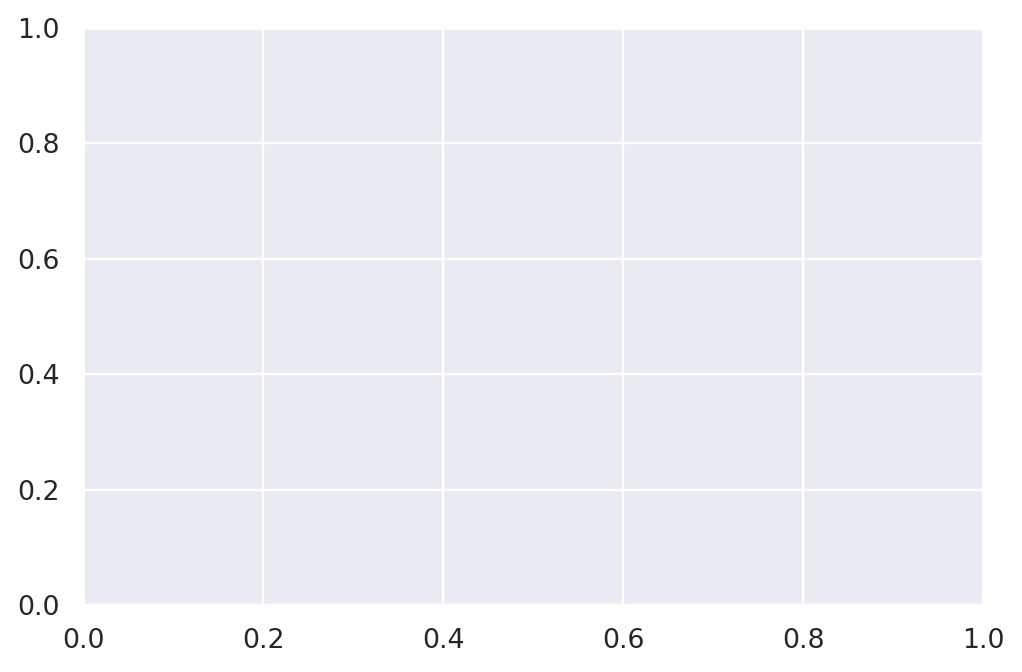

In [105]:
# X = nemci[["hurstovi", "duzine",
#             "odnos_tišine_i_govora", "najduža_priča",	"zcr_prosek",
#             "zcr_min",	"zcr_max",	"zcr_med",	"zcr_stdev",	"pitch_prosek",
#             "pitch_min",	"pitch_max",	"pitch_med",	"pitch_stdev",	"energija_prosek",	"energija_min",
#             "energija_max",	"energija_stdev", "eng_bez_tis",	"eng_bez_tis_avg",	"eng_bez_tis_min",
#             "eng_bez_tis_max",	"eng_bez_tis_med",	"eng_bez_tis_stdev",	"energija_ukupna"]]

X = nemci[[
           'hurstovi','duzine','odnos_tišine_i_govora',
           'najduža_priča','zcr_prosek','zcr_min',
           'zcr_max','zcr_med','zcr_stdev',
           'pitch_prosek','pitch_min','pitch_max',
           'pitch_med','pitch_stdev','energija_prosek','energija_min','energija_max'
           ,'energija_stdev','eng_bez_tis','eng_bez_tis_avg','eng_bez_tis_min','eng_bez_tis_max',
           'eng_bez_tis_med','eng_bez_tis_stdev','energija_ukupna'
           ]]



y = nemci[["bes", "dosada", "gadjenje","strah","sreca", "tuga", "neutralno"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
clf = RandomForestClassifier(n_estimators=50,max_depth=9,max_features=18, random_state=44)
clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)
train_probs = clf.predict_proba(X_train)
#print(predictions)


In [106]:
# print(train_preds[:10])
# print(train_probs[:10])

In [107]:
## bez ovoga mozemo se upucamo u nogu samo
test_p = test_preds.copy()
train_p = train_preds.copy()
for i in range(len(test_p)):
    # print(test_preds[i])
    # print(max(test_preds[i]))
    # print(test_preds[i].argmax())
    test_p[i,test_p[i].argmax()] = 1.0
    test_p[i] = test_p[i] == 1.0
# np.amax(test_preds,axis=1)

for i in range(len(train_p)):
    # print(train_preds[i])
    # print(max(test_preds[i]))
    # print(train_preds[i].argmax())
    train_p[i, train_p[i].argmax()] = 1.0
    train_p[i] = train_p[i] == 1.0

In [108]:
test_acc = accuracy_score(y_test, test_p)
print(test_acc)

0.411214953271028


In [109]:
train_acc = accuracy_score(y_train, train_p)
print(train_acc)

0.9836448598130841


In [112]:
test_conf_matrica = metrics.confusion_matrix(y_test.values.argmax(axis=1), test_p.argmax(axis=1))
print(test_conf_matrica)

[[18  0  0  0  4  0  0]
 [12  3  0  0  0  1  0]
 [ 4  0  1  0  1  0  0]
 [10  0  1  3  1  0  1]
 [ 6  0  0  0  4  0  0]
 [ 5  0  0  0  0  8  1]
 [14  1  0  0  0  1  7]]


2023/07/27 15:00:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '85cf343f53a94e79bf02595ff4fb2922', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2023/07/27 15:00:35 WARNING mlflow.sklearn.utils: log_loss failed. The metric training_log_loss will not be recorded. Metric error: Found array with dim 3. None expected <= 2.
2023/07/27 15:00:35 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: Found array with dim 3. None expected <= 2.
2023/07/27 15:00:35 WARNING mlflow.sklearn.utils: _get_classifier_artifacts.<locals>.plot_confusion_matrix failed. The artifact training_confusion_matrix will not be recorded. Artifact error: multilabel-indicator is not supported
2023/07/27 15:00:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a54af4acd5ed4ad2bd4126a53ed04f6c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/07/27 15:00:37 WARNING mlflow.sklearn.utils: log_loss failed. The metric training_log_loss will not be recorded. Metric error: Found array with dim 

0.418327796234773


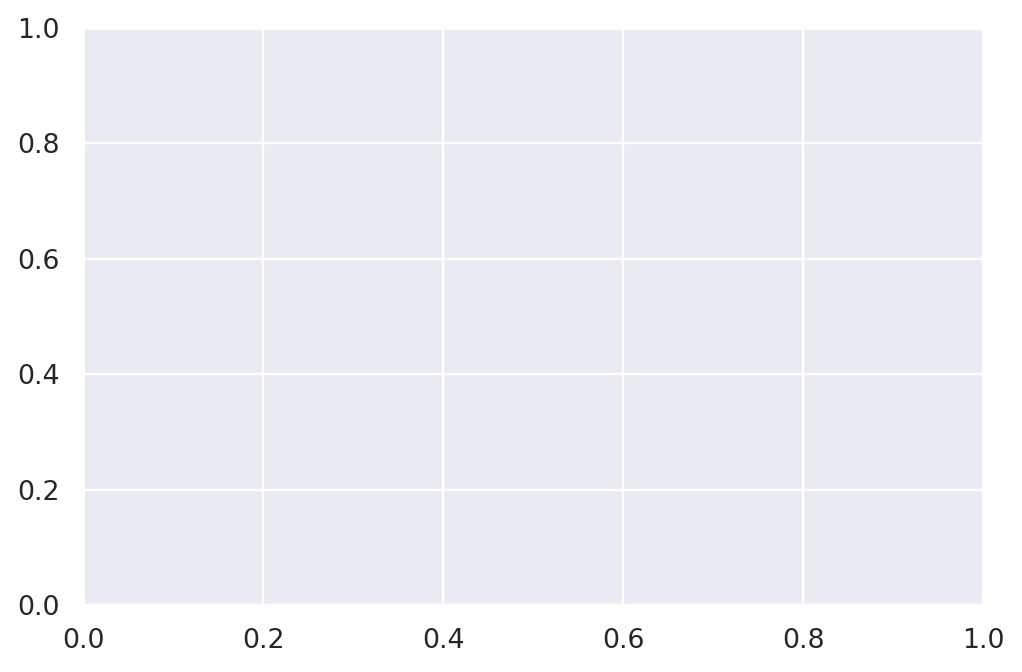

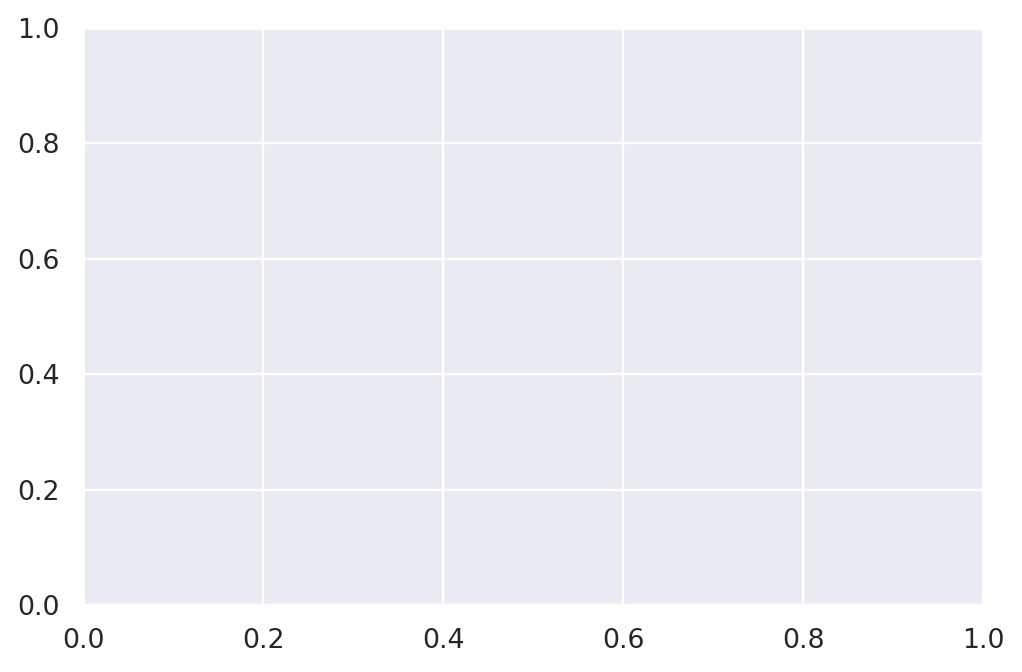

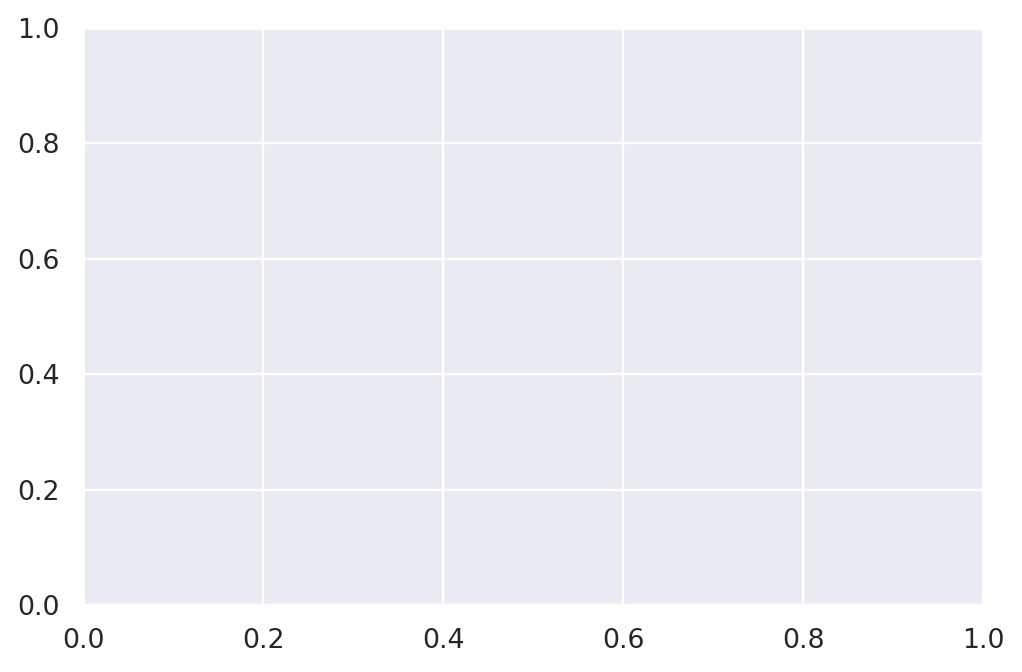

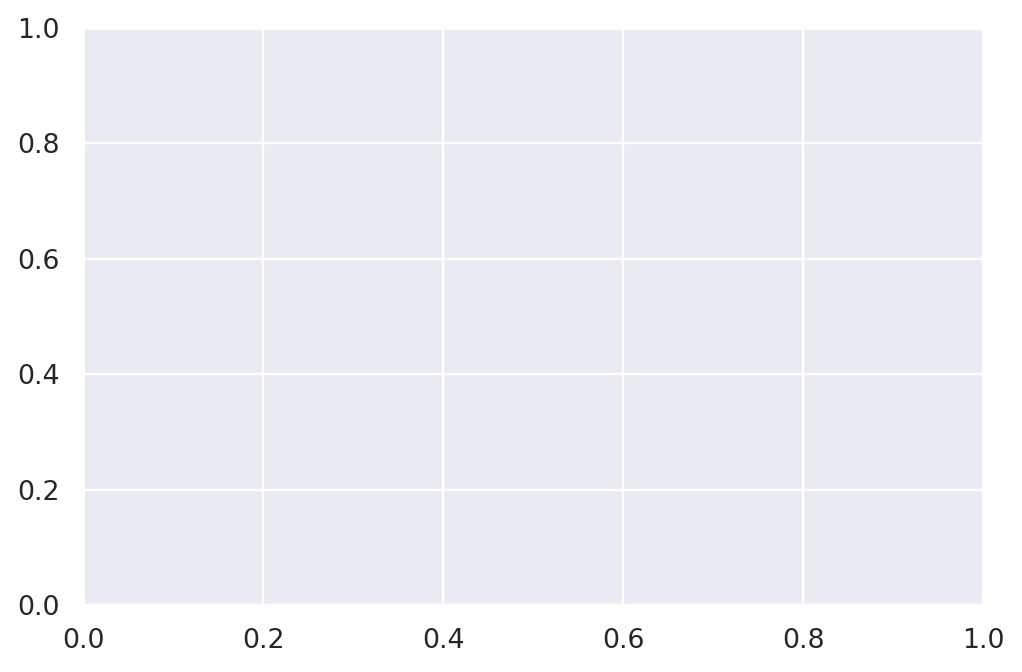

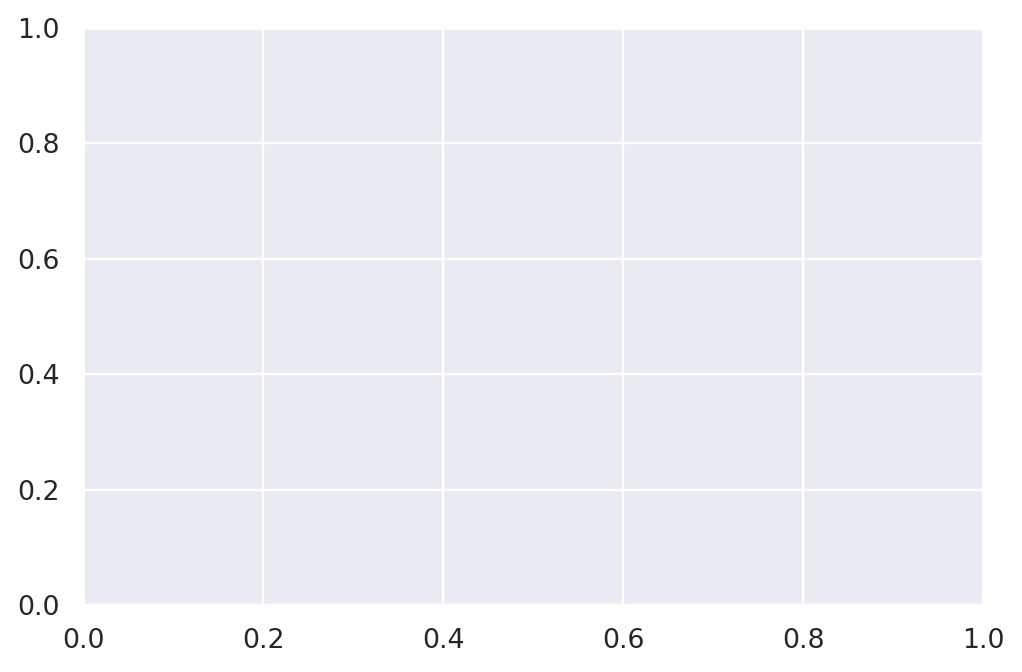

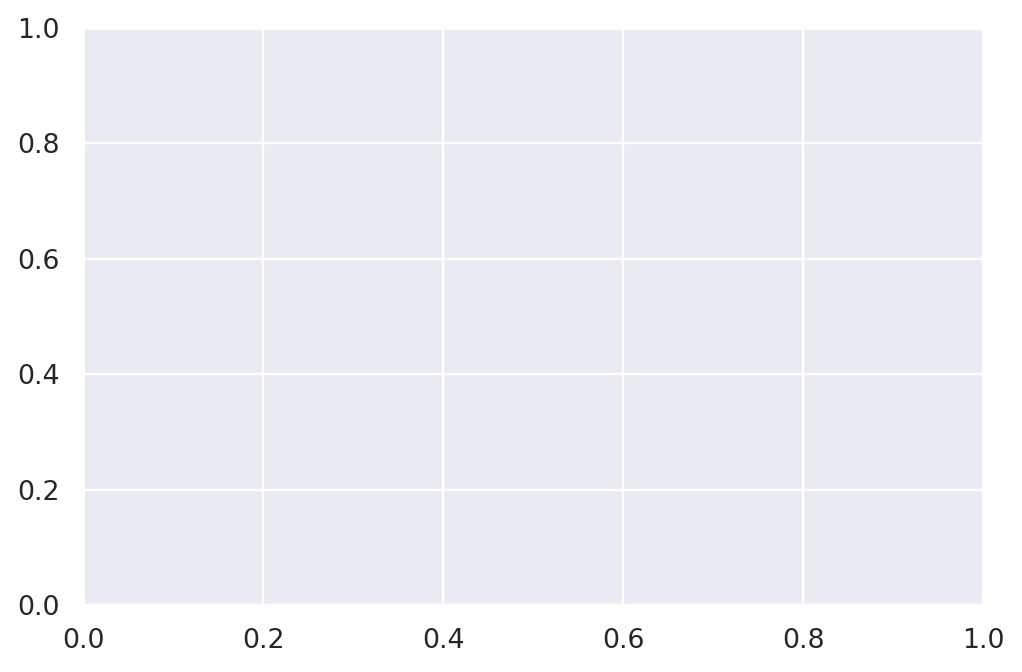

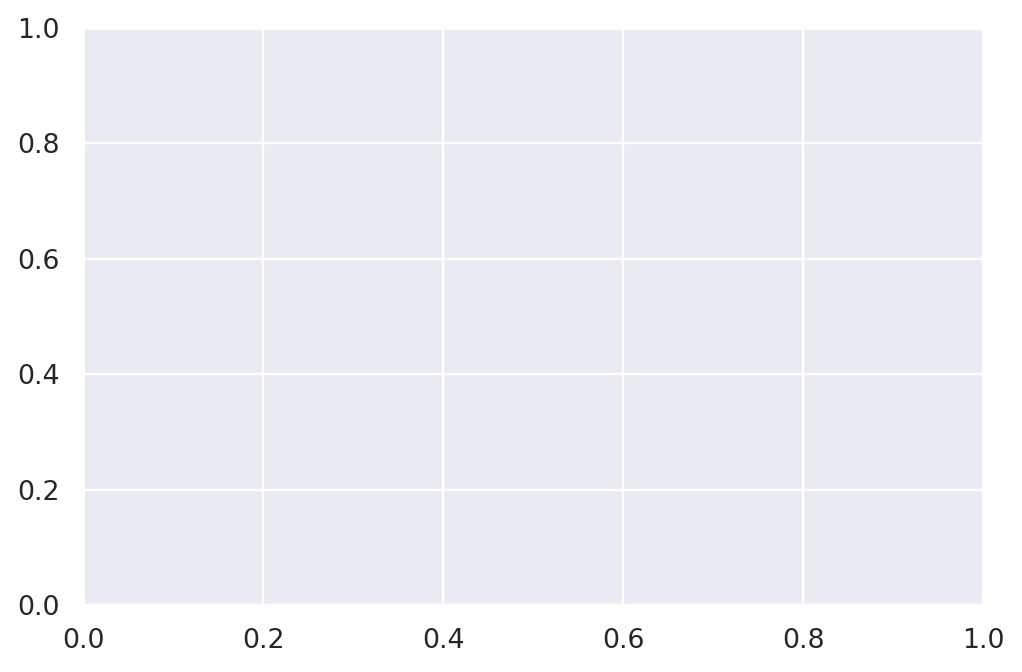

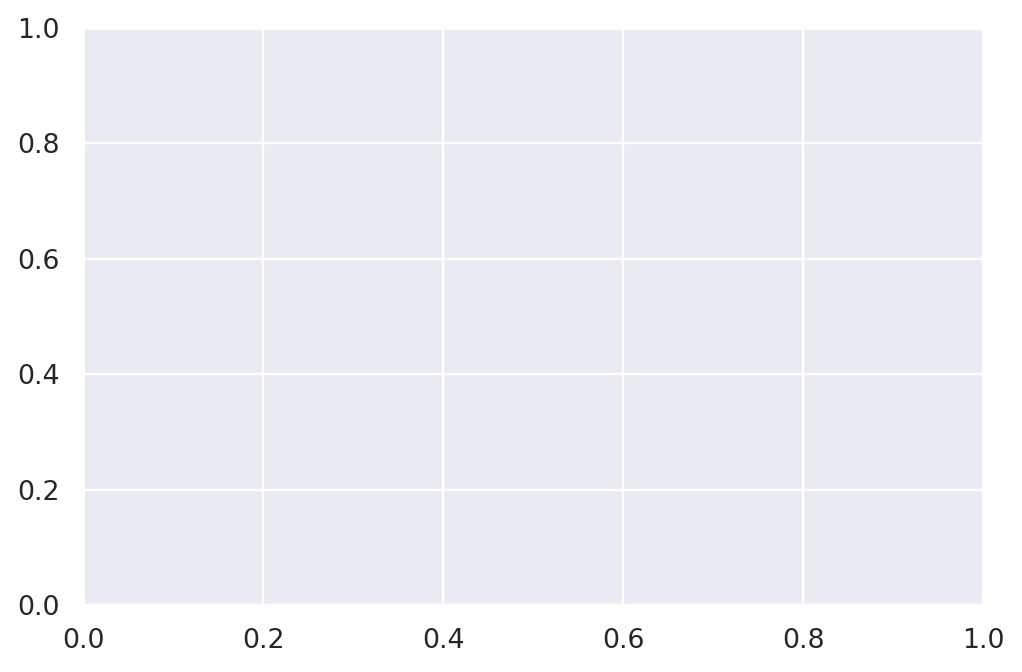

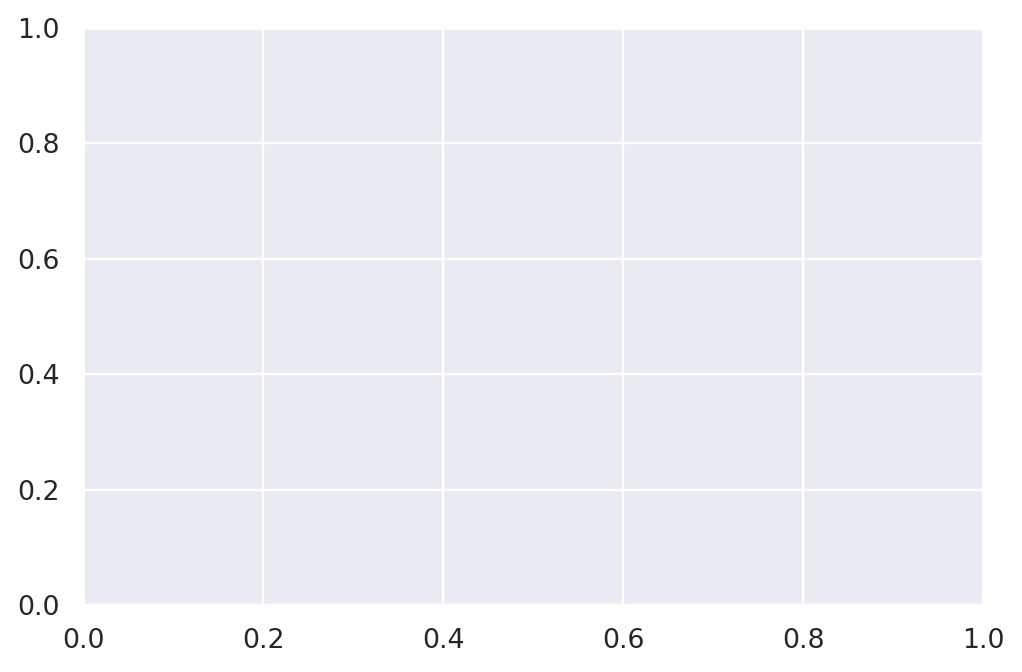

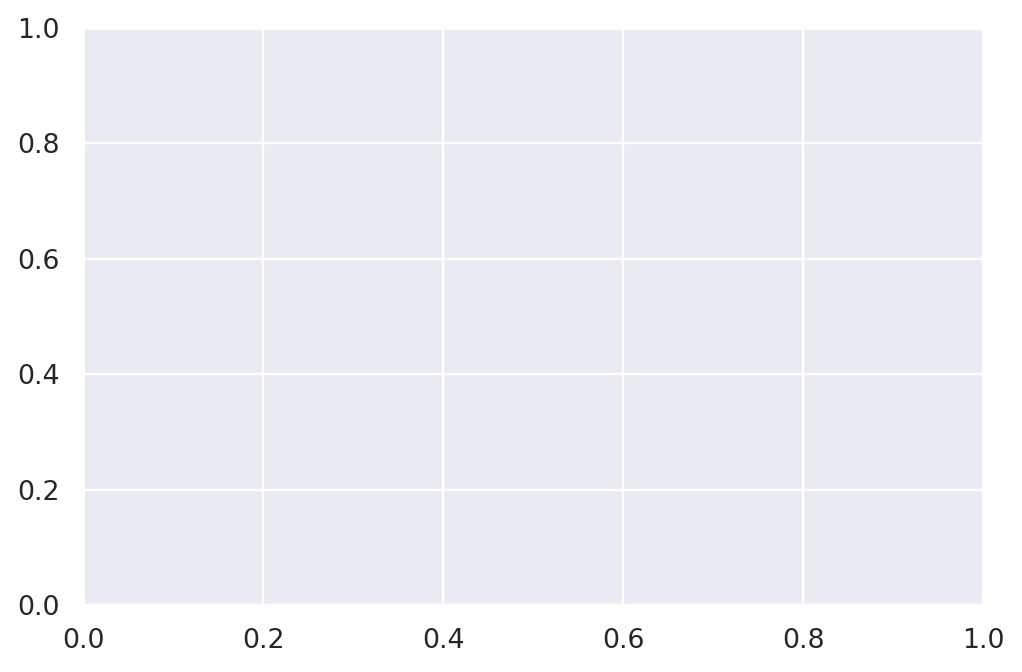

In [111]:
print (np.mean(cross_val_score(clf, X_train, y_train, cv=10)))